Assignment 3: 

Name: Nisarg Upadhyay

UID: 118221625

Please submit to ELMS
- a PDF containing all outputs (by executing **Run all**)
- your ipynb notebook containing all the code

I understand the policy on academic integraty (collaboration and the use of online material).
Please sign your name here: Nisarg Updahyay

In [78]:
## Import necessary libraries here (You can add libraries you want to use here)
import os
import random
import cv2
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

# Part 1: Epipolar Geometry (30 Points)


## Overview

In this problem, you will implement an algorithm for automatically estimating homography with RANSAC. In the file matches.mat, we provide the detected Harris corners row-column positions in variables r1 c1 for the first image; variables r2 c2 for the second image; and the corresponding matched pairs in the variable matches.

<!-- <img src="https://drive.google.com/uc?id=1Tr723u5OXmwkd4RDmu9z886ITJU9j1cL&export=download" width="800"/> -->

<img src="https://drive.google.com/uc?id=17mwO8QH24vw1Kv1aBONgFXKi53HqUMEd&export=download" width="800"/>


The outline of the normalized 8-point algorithm:

<img src="https://drive.google.com/uc?id=1nVnvBpKeLmiowT9Q4_QauogXpcdXBmHm&export=download" width="700"/>



## Data

**WARNING: Colab deletes all files everytime runtime is disconnected. Make sure to re-download the inputs when it happens.**

In [ ]:
# Download Data -- run this cell only one time per runtime
!gdown 1cn3_SscjlLrf4BzUWe8MV-XqMqBY4Nj_
!unzip "/content/Part1_data.zip" -d "/content/"
# Load Matches
data = loadmat('/content/Part1_data/matches.mat')
r1 = data['r1']
r2 = data['r2']
c1 = data['c1']
c2 = data['c2']
matches = data['matches']

Downloading...
From: https://drive.google.com/uc?id=1cn3_SscjlLrf4BzUWe8MV-XqMqBY4Nj_
To: /content/Part1_data.zip
100% 157k/157k [00:00<00:00, 74.4MB/s]
Archive:  /content/Part1_data.zip
   creating: /content/Part1_data/
  inflating: /content/Part1_data/chapel00.png  
  inflating: /content/Part1_data/chapel01.png  
  inflating: /content/Part1_data/matches.mat  


## Helper Functions

In [79]:
from scipy.ndimage import gaussian_filter as gf
from google.colab.patches import cv2_imshow

def show_image(img, scale=1.0):
    plt.figure(figsize=scale* plt.figaspect(1))
    plt.imshow(img, interpolation='nearest')
    plt.gray() 
    plt.axis('off')
    plt.show()


### Code (15 pt)

In [80]:
def ransacF(x1, y1, x2, y2):
  # Find normalization matrix
  # Transform point set 1 and 2
  # RANSAC based 8-point algorithm
  # YOUR CODE HERE: 

  return None

def getInliers(pt1, pt2, F, thresh):
  # Function: implement the criteria checking inliers. 
  # YOUR CODE HERE:

  return None


def normalize(x, y):
  # Function: find the transformation to make it zero mean and the variance as sqrt(2)
  # YOUR CODE HERE: 
  
  return None

  
def computeF(x1, y1, x2, y2):
  #  Function: compute fundamental matrix from corresponding points
  # YOUR CODE HERE: 
  
  return None



The Fundamental Matrix After Denormalization
[[-3.69278765e-07  4.53864863e-06 -1.84405633e-03]
 [-1.68855934e-06  1.21399848e-06  9.11653397e-03]
 [ 1.54034135e-03 -1.05266154e-02  1.43221740e-01]]


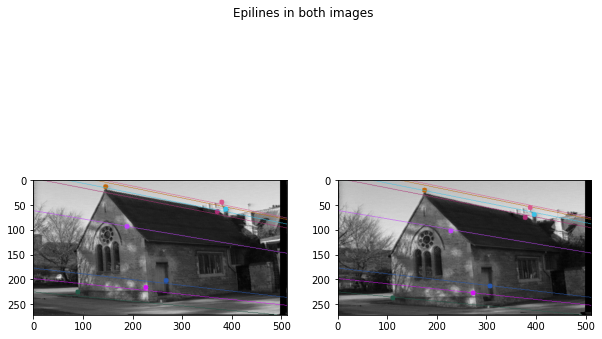

In [82]:
#Importing Libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

sift = cv2.xfeatures2d.SIFT_create()
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Function to detect the key points 
def sift_detector(imgA, imgB):
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(imgA, None) 
    kp2, des2 = sift.detectAndCompute(imgB, None)
    bf = cv2.BFMatcher()

    # Finding the best points based on nearest neignbour
    matches = bf.knnMatch(des1, des2, k=2)
    good = []
    
    for m, n in matches:
        if m.distance < 0.3 * n.distance:
            good.append(m)
    # Forming an array of feature points
    matched_pairs = []
    matches = sorted(good, key = lambda x :x.distance)
    for i, m1 in enumerate(matches):
        pt1 = kp1[m1.queryIdx].pt
        pt2 = kp2[m1.trainIdx].pt
        matched_pairs.append([pt1[0], pt1[1], pt2[0], pt2[1]])
    matched_pairs = np.array(matched_pairs).reshape(-1, 4)
    return matched_pairs

# Function to draw epilines
def draw_epilines(img1, lines, pts1, pts2):
    r, c = img1.shape
    img1_three_channel = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
    np.random.seed(0)
    for r, pt1, pt2 in zip(lines, pts1, pts2):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2]/r[1]])
        x1, y1 = map(int, [c, -(r[2]+r[0]*c)/r[1]])
        img1_three_channel = cv2.line(img1_three_channel, (x0, y0), (x1, y1), color, 1)
        x1,y1 =pt1[0],pt1[1]
        x1  = int(x1)
        y1  = int(y1)	
        final_img = cv2.circle(img1_three_channel, (x1,y1), 5, color, -1)
    return final_img

# Function to normalize Points
def normalize(points):

    mean = np.mean(points, axis=0)
    x_mean ,y_mean = mean[0], mean[1]
    
    x_norm = points[:,0] - x_mean
    y_norm = points[:,1] - y_mean

    s = (2/np.mean(x_norm**2 + y_norm**2))**(0.5)
    T_scale = np.diag([s,s,1])
    T_trans = np.array([[1,0,-x_mean],[0,1,-y_mean],[0,0,1]])
    Transform = T_scale.dot(T_trans)

    x_ = np.column_stack((points, np.ones(len(points))))
    x_norm = (Transform.dot(x_.T)).T

    return  x_norm, Transform

# Function to find Fundamental matrix
def FundamentalMatrix(feature_matches):
    # Spliting the data
    x1 = feature_matches[:,0:2]
    x2 = feature_matches[:,2:4]
    
    # Normalizing the data
    x1_norm, T1 = normalize(x1)
    x2_norm, T2 = normalize(x2)
    
    # Creating a fundamental matrix
    A = np.zeros((len(x1_norm),9))
    for i in range(0, len(x1_norm)):
        x_1,y_1 = x1_norm[i][0], x1_norm[i][1]
        x_2,y_2 = x2_norm[i][0], x2_norm[i][1]
        A[i] = np.array([x_1*x_2, x_2*y_1, x_2, y_2*x_1, y_2*y_1, y_2, x_1, y_1, 1])

    U, S, VT = np.linalg.svd(A, full_matrices=True)
    F = VT.T[:, -1]
    F = F.reshape(3,3)

    u, s, vt = np.linalg.svd(F)
    s = np.array([[s[0],0,0],[0,s[1],0],[0,0,0]])
    F = np.dot(u, np.dot(s, vt))
    
    # Denormlizing the Fundamental Matrix
    F = np.dot(T2.T, np.dot(F, T1))
    return F



def getInliers(features):
    n_iterations = 1000
    error_thresh = 0.5
    inliers_thresh = 0
    chosen_indices = []

    for i in range(0, n_iterations):
        indices = []
        #select 8 points randomly
        n_rows = features.shape[0]
        random_indices = np.random.choice(n_rows, size=8)
        features_8 = features[random_indices, :] 
        F = FundamentalMatrix(features_8) # Calculating fundamental Matrix
        for j in range(8):
            feature = features[j]
            x1,x2 = feature[0:2], feature[2:4]
            p1=np.array([x1[0], x1[1], 1]).T
            p2=np.array([x2[0], x2[1], 1])
            error =abs( np.dot(p1, np.dot(F, p2))) # Calculating the error between the data points
            
            # Filtering Inliears
            if error < error_thresh:
                indices.append(j)
         
        # Selecting the best Fundamental matrix and the Points to plot the epipolar lines
        if len(indices) > inliers_thresh:
            inliers_thresh = len(indices)
            chosen_indices = indices
            F_best = F

    inliers = features[chosen_indices, :]
    return F_best, inliers



img1 = cv2.imread('/content/Part1_data/chapel00.png')
img2 = cv2.imread('/content/Part1_data/chapel01.png')

image1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) 
image2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Finding the matched pairs
matched_pairs = sift_detector(image1_gray, image2_gray)

# Finding the best fundamental matrix and best matched pairs
F_best, matched_pairs_inliers = getInliers(matched_pairs)

pts1 = matched_pairs_inliers[:,0:2]
pts2 = matched_pairs_inliers[:,2:4]

points1 = np.hstack((pts1, np.ones((len(pts1), 1))))
points2 = np.hstack((pts2, np.ones((len(pts2), 1))))


points1 = np.array(points1)
points2 = np.array(points2)

# Creating epiline for image 1
lines1 = []
for i in range(len(points1)):
  x = np.dot(F_best,np.transpose(points1[i]))
  lines1.append(x)


# Creating epiline for image 2
lines2 = []
for i in range(len(points2)):
  y = np.dot(F_best,np.transpose(points1[i]))
  lines2.append(y)

# Drawing Epilines
img_left = draw_epilines(image1_gray, lines1, np.array(points1), np.array(points2))
img_right = draw_epilines(image2_gray, lines2, np.array(points2), np.array(points2))

# Ploting the epipolar lines
fig = plt.figure(figsize = (10, 7))
plt.subplot(121)
plt.imshow(img_left)
plt.subplot(122)
plt.imshow(img_right)
plt.suptitle("Epilines in both images")
print("The Fundamental Matrix After Denormalization")
print(F_best)

### Write-up (15 pt)
*   Describe what test you used for deciding inlier vs. outlier.
*   Display the estimated fundamental matrix F after normalizing to unit length
*   Randomly select 7 sets of matching points. Plot the corresponding epipolar lines and the points on each image. Show the two images (with plotted points and lines) next to each other.

<!-- *   Plot the outlier keypoints with green dots on top of the first image -->
<!-- *   Randomly select 7 sets of matching points. Plot the corresponding epipolar lines ('g’) and the points (with 'r+’) on each image. Show the two images (with plotted points and lines) next to each other. -->



Answer 1) 
Steps to find inlier and outliers
I took the feature points and randomly selected 8 feature points from both the images.
i sepearted those feature points based on the images they belong.
Then i calculated the error between the 2 points by using the dot product between the points of one image and the dot product of the feature point with the fundamental matrix. As the fundamental matrix shows the corrospondence of feature 2 with respect to feature 1.
I decided the error thresold and passed the points which staisfed the condition. That is how Inliears and outliears were seperated.


Answer 2) 
The Fundamental matrix is printed above the plotted image


Answer3)
The images side by side with epipolar lines are plotted above


### Hint

*   You can use cv2.cornerHarris in opencv.
*   For visualization, you can use cv2.line, cv2.circle or any other helper functions in opencv or matplotlib.


# Part 2: Image stitching (30 points)

<img src="https://drive.google.com/uc?id=1uOI8rpqb_FsR9Fi8GrGPZvICOcgflBj9&export=download" width="800"/>

## Overview

In this problem, you will implement an algorithm for automatically estimating the fundamental matrix F using RANSAC and the normalized 8-point algorithm. 

Image Stitching Algorithm Overview
1. Detect keypoints
2. Match keypoints
3. Estimate homography with matched keypoints (using RANSAC)
4. Combine images

**Note:**  Do not use existing image stitching code, such as found on the web, and OpenCV.

## Data

**WARNING: Colab deletes all files everytime runtime is disconnected. Make sure to re-download the inputs when it happens.**

In [ ]:
# Download Data -- run this cell only one time per runtime
!gdown 1fnD0hJ8-_Rngsc-m96ghKtdZAMf0VTjy
!unzip "/content/hill.zip" -d "/content/hill"

!gdown 1v2BFVMV0McuD5BstLvDmo1U9MrFAByS5
!unzip "/content/tv.zip" -d "/content/tv"


Downloading...
From: https://drive.google.com/uc?id=1fnD0hJ8-_Rngsc-m96ghKtdZAMf0VTjy
To: /content/hill.zip
100% 205k/205k [00:00<00:00, 82.7MB/s]
Archive:  /content/hill.zip
replace /content/hill/1.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: Downloading...
From: https://drive.google.com/uc?id=1v2BFVMV0McuD5BstLvDmo1U9MrFAByS5
To: /content/tv.zip
100% 130k/130k [00:00<00:00, 73.9MB/s]
Archive:  /content/tv.zip
replace /content/tv/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Helper Functions

In [83]:
import cv2

def drawMatches(image1, kp1, image2, kp2, idx_pairs):
    keypt1 = [cv2.KeyPoint(coord[1], coord[0], 40) for coord in kp1.tolist()]
    keypt2 = [cv2.KeyPoint(coord[1], coord[0], 40) for coord in kp2.tolist()]
    matches = [cv2.DMatch(pair[0], pair[1], 0) for pair in idx_pairs.tolist()]
    return cv2.drawMatches(image1, keypt1, image2, keypt2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

def plot_matches(images, feature_coord, matches, img_idx):
    matched_img = drawMatches(images[img_idx], feature_coord[img_idx], images[img_idx-1], 
                              feature_coord[img_idx-1], matches[img_idx-1])

    cv2.imshow('Matches Found', matched_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def est_homography(src, dest):
    N = src.shape[0]
    if N != dest.shape[0]:
        raise ValueError("src and diff should have the same dimension")
    src_h = np.hstack((src, np.ones((N, 1))))
    A = np.array([np.block([[src_h[n], np.zeros(3), -dest[n, 0] * src_h[n]],
                            [np.zeros(3), src_h[n], -dest[n, 1] * src_h[n]]])
                  for n in range(N)]).reshape(2 * N, 9)
    [_, _, V] = np.linalg.svd(A)
    return V.T[:, 8].reshape(3, 3)

def apply_homography(H, src):
    src_h = np.hstack((src, np.ones((src.shape[0], 1))))
    dest =  src_h @ H.T
    return (dest / dest[:,[2]])[:,0:2]

### Code (15 pt)

Homography Matrix after RANSAC for image1 and image 2
[[ 8.79472185e-01  5.64045150e-02  1.44602915e+02]
 [-9.21558019e-02  9.67557811e-01 -1.07097702e+01]
 [-3.19419100e-04  3.24354626e-05  1.00000000e+00]]
Homography Matrix after RANSAC for image3 and Wrapped image obtained from image 1 and image 2
[[ 7.76166489e-01  6.20847457e-02  2.76897722e+02]
 [-1.29936839e-01  9.73023868e-01 -3.86937579e+01]
 [-5.85820879e-04  3.56812301e-05  1.00000000e+00]]


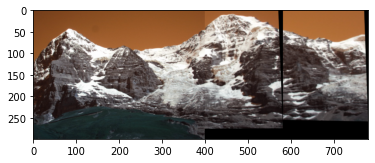

In [84]:
# Importing Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Function for the sift points and the descriptors 
def sift_detector(imgA, imgB):
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(imgA, None) 
    kp2, des2 = sift.detectAndCompute(imgB, None)
    bf = cv2.BFMatcher()

    # Finding the best points based on nearest neignbour
    matches = bf.knnMatch(des1, des2, k=2)
    good = []
    best_matches = []
    for m, n in matches:
        if m.distance < 0.5 * n.distance:
            good.append(m)
            best_matches.append([m])

    feature_1 = []
    feature_2 = []

    for i, match in enumerate(good):
        feature_1.append(kp1[match.queryIdx].pt)
        feature_2.append(kp2[match.trainIdx].pt)
    return feature_1, feature_2, kp1, kp2, best_matches,good

# Function to Crop the Frame
def trim(frame):
    #crop top
    if not np.sum(frame[0]):
        return trim(frame[1:])
    #crop top
    if not np.sum(frame[-1]):
        return trim(frame[:-2])
    #crop top
    if not np.sum(frame[:,0]):
        return trim(frame[:,1:])
    #crop top
    if not np.sum(frame[:,-1]):
        return trim(frame[:,:-2])
    return frame

# Function to Find Homography
def find_homography(point1, point2):

  #Creating Homography matrix
  A = []
  for i in range(0, len(point1)):
      x, y = point1[i][0], point1[i][1]
      u, v = point2[i][0], point2[i][1]
      A.append([x, y, 1, 0, 0, 0, -u * x, -u * y, -u])
      A.append([0, 0, 0, x, y, 1, -v * x, -v * y, -v])
  A = np.asarray(A)
  U, S, Vh = np.linalg.svd(A)  # Using SVD file
  H_col = Vh[-1, :] / Vh[-1, -1]
  H = H_col.reshape(3, 3)
  return H

#FUnction to find Ransac
def RANSAC(pts1,pts2):
    pts1_ = np.hstack((pts1, np.ones((len(pts1), 1))))
    pts2_ = np.hstack((pts2, np.ones((len(pts2), 1))))
    count = 0
    thresh = 20000
    np.random.seed(0)

    while count < 1:
        count = count + 1
        score = 0
        rand_idx = np.random.randint(len(pts1_), size=8)
        rand_pts1, rand_pts2, inlier_idxs = [], [] ,[]
        for i in range(len(rand_idx)):
            rand_pts1.append(pts1_[rand_idx[i]])
            rand_pts2.append(pts2_[rand_idx[i]])

        rand_pts1 = np.array(rand_pts1)
        rand_pts2 = np.array(rand_pts2)
        H = find_homography(rand_pts1, rand_pts2)
        for i in range((8)):
            pt1 = np.array([pts1_[i][0], pts1_[i][1], 1])

            pt2 = np.array([pts2_[i][0], pts2_[i][1], 1])
            constraint = abs(np.dot(pt2,np.dot(H,pt1.T)))
            if constraint > thresh:
                inlier_idxs.append(i)
                H_matrix = H
    return H_matrix


img_1 = cv2.imread('/content/hill/2.JPG')
img1 = cv2.cvtColor(img_1,cv2.COLOR_RGB2GRAY)

img_2 = cv2.imread('/content/hill/1.JPG')
img2 = cv2.cvtColor(img_2,cv2.COLOR_RGB2GRAY)

img_3 = cv2.imread('/content/hill/3.JPG')
img3 = cv2.cvtColor(img_3,cv2.COLOR_RGB2GRAY)

# Initiate SIFT detector
sift = cv2.SIFT_create()
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# find the keypoints and descriptors with SIFT
feature_1, feature_2, kp1, kp2, matches,good = sift_detector(img1, img2)
img_f = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None,
                          flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


points1 = np.zeros((len(good), 2), dtype=np.float32)  
points2 = np.zeros((len(good), 2), dtype=np.float32)

for i, good in enumerate(good):
   points1[i, :] = kp1[good.queryIdx].pt    
   points2[i, :] = kp2[good.trainIdx].pt   

# Find the best Homography Matrix
H_1  = RANSAC(points1,points2)

#Wrapping the image

img_4 = cv2.warpPerspective(img_1,H_1,(img_1.shape[1] + img_2.shape[1], img_1.shape[0]))
img_4[0:img_2.shape[0],0:img_2.shape[1]] = img_2

#Triming the image
img_4_t = trim(img_4)

# Applying the same process to stich 3 image on to previous stiched image
img4 = cv2.cvtColor(img_4,cv2.COLOR_BGR2GRAY)
feature_1, feature_2, kp1, kp2, matches,good = sift_detector(img3, img4)
img_final = cv2.drawMatchesKnn(img3, kp1, img4, kp2, matches, None,
                          flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)



points_1 = np.zeros((len(good), 2), dtype=np.float32)  
points_2 = np.zeros((len(good), 2), dtype=np.float32)


for i, good in enumerate(good):
   points_1[i, :] = kp1[good.queryIdx].pt    
   points_2[i, :] = kp2[good.trainIdx].pt   


H_2 = RANSAC(points_1,points_2)

dst = cv2.warpPerspective(img_3,H_2,(img_3.shape[1] + img_4.shape[1], img_3.shape[0]))
dst[0:img_4_t.shape[0],0:img_4_t.shape[1]] = img_4_t
print("Homography Matrix after RANSAC for image1 and image 2")
print(H_1)
print("Homography Matrix after RANSAC for image3 and Wrapped image obtained from image 1 and image 2")
print(H_2)
dst = trim(dst)
plt.imshow((dst))

Homography Matrix after RANSAC for image1 and image 2
[[ 6.31321739e-01 -1.62000116e-02  2.66638406e+02]
 [-2.32414839e-01  8.97876803e-01  2.99922405e+01]
 [-7.70615456e-04 -3.45958776e-05  1.00000000e+00]]
Homography Matrix after RANSAC for image3 and Wrapped image obtained from image 1 and image 2
[[ 7.19658592e-02  1.27802492e-01  4.76283394e+02]
 [-6.63222521e-01  1.15300771e+00 -1.27528527e+01]
 [-2.04238498e-03  2.87301463e-04  1.00000000e+00]]


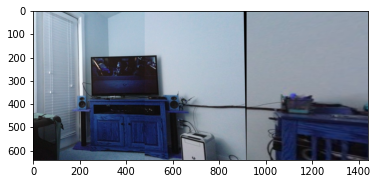

In [85]:
img_1 = cv2.imread('/content/tv/2.jpg')
img1 = cv2.cvtColor(img_1,cv2.COLOR_RGB2GRAY)

img_2 = cv2.imread('/content/tv/1.jpg')
img2 = cv2.cvtColor(img_2,cv2.COLOR_RGB2GRAY)

img_3 = cv2.imread('/content/tv/3.jpg')
img3 = cv2.cvtColor(img_3,cv2.COLOR_RGB2GRAY)

# Initiate SIFT detector
sift = cv2.SIFT_create()
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# find the keypoints and descriptors with SIFT
feature_1, feature_2, kp1, kp2, matches,good = sift_detector(img1, img2)
img_f = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None,
                          flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


points1 = np.zeros((len(good), 2), dtype=np.float32)  
points2 = np.zeros((len(good), 2), dtype=np.float32)

for i, good in enumerate(good):
   points1[i, :] = kp1[good.queryIdx].pt    
   points2[i, :] = kp2[good.trainIdx].pt   

# Find the best Homography Matrix
H_1  = RANSAC(points1,points2)

#Wrapping the image

img_4 = cv2.warpPerspective(img_1,H_1,(img_1.shape[1] + img_2.shape[1], img_1.shape[0]))
img_4[0:img_2.shape[0],0:img_2.shape[1]] = img_2

#Triming the image
img_4_t = trim(img_4)

# Applying the same process to stich 3 image on to previous stiched image
img4 = cv2.cvtColor(img_4,cv2.COLOR_BGR2GRAY)
feature_1, feature_2, kp1, kp2, matches,good = sift_detector(img3, img4)
img_final = cv2.drawMatchesKnn(img3, kp1, img4, kp2, matches, None,
                          flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)



points_1 = np.zeros((len(good), 2), dtype=np.float32)  
points_2 = np.zeros((len(good), 2), dtype=np.float32)


for i, good in enumerate(good):
   points_1[i, :] = kp1[good.queryIdx].pt    
   points_2[i, :] = kp2[good.trainIdx].pt   


H_2 = RANSAC(points_1,points_2)

dst = cv2.warpPerspective(img_3,H_2,(img_3.shape[1] + img_4.shape[1], img_3.shape[0]))
dst[0:img_4_t.shape[0],0:img_4_t.shape[1]] = img_4_t
print("Homography Matrix after RANSAC for image1 and image 2")
print(H_1)
print("Homography Matrix after RANSAC for image3 and Wrapped image obtained from image 1 and image 2")
print(H_2)
dst = trim(dst)
plt.imshow((dst))

### Write-up (15 pt)
*  Describe how to remove incorrect matches with RANSAC 
*  Display the best homography H after RANSAC 
*  Display the blended images

Answer 1)

Steps to find incorrect matched
I took the feature points and randomly selected 8 feature points from both the images.

Then i calculated the constraint between the 2 points by using the dot product between the points of one image and the dot product of the feature point with the Homography. As the Homography shows the location of feature 2 with respect to feature 1.
I decided the error thresold and passed the points which staisfed the condition. That is incorrect matches were seperated.


Answer 2) 
The Homography matrix for both the images is printed above the plotted image


Answer3)
Blended Images are plotted above

### Hint


*   Use Harris Corner Detection to find keypoint. You can use cv2.cornerHarris in opencv.
*   For image warping and blending, you should first deterimne canvas size. You can use cv2.warpPerspective in opencv. 


# Part 3: Affine Structure from Motion (40 points)

## Overview
<img src="https://drive.google.com/uc?id=1nYd0eJjBtVIPuapfxuiVzswjswGN_Gq2&export=download" width="800"/>


This problem continues the interest point detection and tracking problem from HW2. Now, you will recover a 3D pointcloud from the image sequence hotel.seq0.png … hotel.seq50.png. You are encouraged to use your results from HW2, but in case you were not able to complete it, we have also included pre- computed intermediate results in the supplemental material. Submit your code so that we can reproduce your results.

The outline of the affine structure from motion algorithm:

<img src="https://drive.google.com/uc?id=1BSvHwRR5gNBwDGlrk-dcLCRcuIAvab__&export=download" width="700"/>


## Data

**WARNING: Colab deletes all files everytime runtime is disconnected. Make sure to re-download the inputs when it happens.**

In [ ]:
# Download Data -- run this cell only one time per runtime
!gdown 1A0Rin_YMmWkExjI99vfLYvU_dy-9gFTT
!unzip "/content/Part2_data.zip" -d "/content/"


Downloading...
From: https://drive.google.com/uc?id=1A0Rin_YMmWkExjI99vfLYvU_dy-9gFTT
To: /content/Part2_data.zip
100% 5.44M/5.44M [00:00<00:00, 203MB/s]
Archive:  /content/Part2_data.zip
replace /content/Part2_data/images/hotel.seq0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Code (20 pt)

In [88]:
from scipy.io import loadmat
import numpy as np
import math

#Function to nearest Positive Definite
def nearestPD(A):


    B = (A + A.T) / 2

    _, s, V = np.linalg.svd(B)

    H = np.dot(V.T, np.dot(np.diag(s), V))

    A2 = (B + H) / 2

    A3 = (A2 + A2.T) / 2

    if isPD(A3):
        return A3

    spacing = np.spacing(np.linalg.norm(A))

    I = np.eye(A.shape[0])
    k = 1
    while not isPD(A3):
        mineig = np.min(np.real(np.linalg.eigvals(A3)))
        A3 += I * (-mineig * k**2 + spacing)
        k += 1

    return A3
def isPD(B):
    """Returns true when input is positive-definite, via Cholesky"""
    try:
        _ = np.linalg.cholesky(B)
        return True
    except np.linalg.LinAlgError:
        return False


data = loadmat('/content/Part2_data/tracks.mat')
track_x = data["track_x"]
track_y = data["track_y"]

# Removing the Nan from the data
track_x = track_x[~np.isnan(track_x).any(axis=1),:]
track_y = track_y[~np.isnan(track_y).any(axis=1),:]

# Removing the translation part 
features_x=track_x-track_x.mean(axis=0,keepdims=True)
features_y=track_y-track_y.mean(axis=0,keepdims=True)

# Create a D matrix
D=np.concatenate((features_x.T, features_y.T), axis=0)


U,S,V = np.linalg.svd(D, full_matrices = True) # SVD

# Converting to Rank 3
U = U[:, 0:3]
W = np.diag(S)
W = W[0:3,0:3]
V = V[0:3,:]

A_aprox = np.dot(U ,(np.sqrt(W)))
X_aprox = np.dot((np.sqrt(W)), V)

# Removing the affine ambiguity 
A = np.zeros((153,9))
k = np.zeros((153,1))
for (i,j) in zip(range(0,153,3),range(0,51)):
    G = A_aprox[j]
    a = G[0]
    b = G[1]
    c = G[2]
    
    G1 = A_aprox[j+51]
    d = G1[0]
    e = G1[1]
    f = G1[2]
    x = [a,b,c]
    y = [d,e,f]
    x=np.asmatrix(x)
    y=np.asmatrix(y)
    xT=np.transpose(x)
    yT=np.transpose(y)

    A[i] =np.reshape((xT@x),(1,9))
    
    A[i+1] =np.reshape((yT@y),(1,9))
    A[i+2] = np.reshape((xT@y),(1,9))

    k[i] = 1
    k[i+1] = 1
    k[i+2] = 0   

A_inv = np.linalg.pinv(A)
L = np.reshape((A_inv@k),(3,3))

L = nearestPD(L)
C = np.linalg.cholesky(L)

# updating the Structure and Motion 
A_aprox = A_aprox@C
C_inv = np.linalg.inv(C)
X_aprox = C_inv@X_aprox


In [89]:
# Generating 3D plots
import matplotlib.pyplot as plt
x_data = X_aprox[1,:]
y_data = X_aprox[2,:]
z_data = X_aprox[0,:]


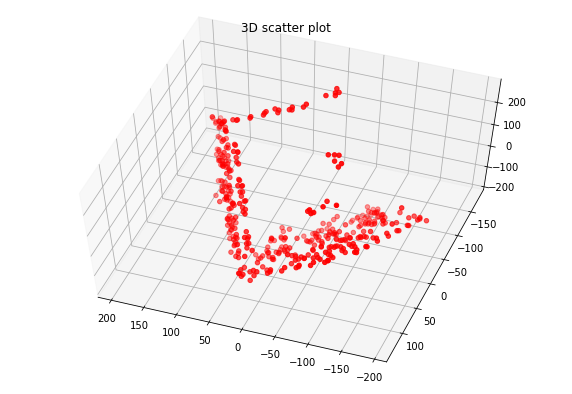

In [90]:
# Plot 1
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x_data, y_data, z_data, color = "red")
plt.title("3D scatter plot")

# Change Viewpoint
ax.view_init(60, 110)
# show plot
plt.show()

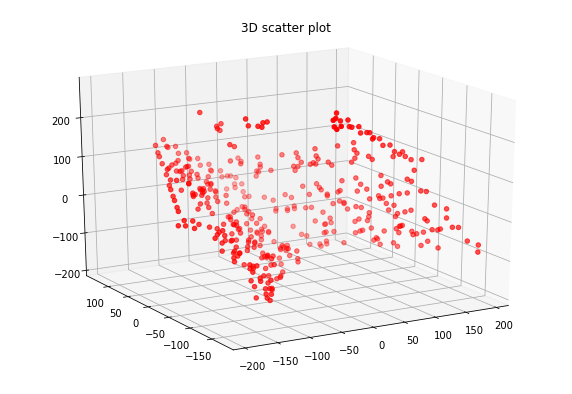

In [91]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x_data, y_data, z_data, color = "red")
plt.title("3D scatter plot")
 
ax.view_init(20,-120)
# show plot
plt.show()

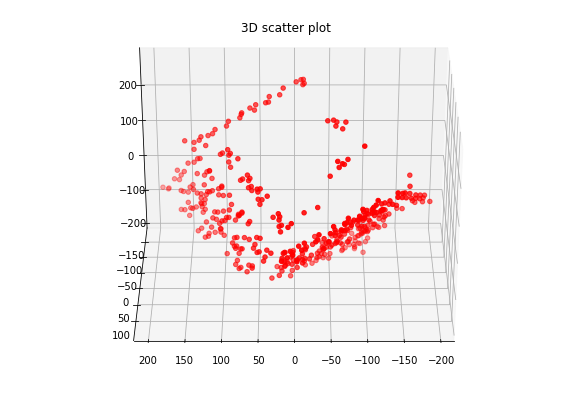

In [92]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x_data, y_data, z_data, color = "red")
plt.title("3D scatter plot")
 
ax.view_init(30, 90)
# show plot
plt.show()

In [93]:
A_i = A_aprox[0:51,:]
A_j = A_aprox[51:102,:]
A_k = np.cross(A_i,A_j)

def normalize_2d(matrix):
    norm = np.linalg.norm(matrix)
    matrix = matrix/norm  # normalized matrix
    return matrix

A_K = normalize_2d(A_k)

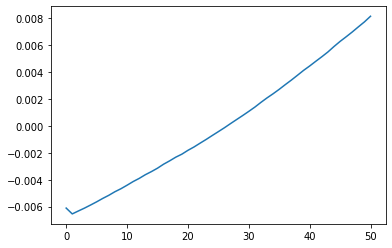

In [94]:
plt.plot(A_K[:,0])
plt.show()

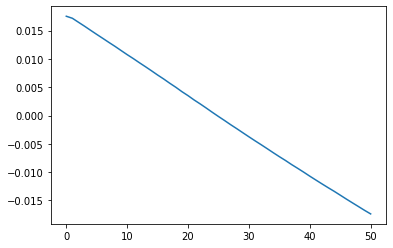

In [95]:
plt.plot(A_K[:,1])
plt.show()

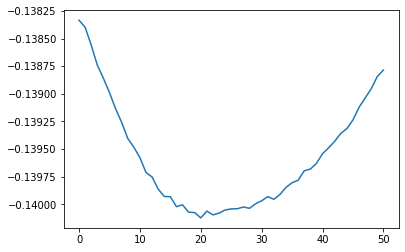

In [96]:
plt.plot(A_K[:,2])
plt.show()

### Write-up (20 pt)


*   Plot the predicted 3D locations of the tracked points for 3 different viewpoints. Choose the viewpoints so that the 3D structure is clearly visible.
*   Plot the predicted 3D path of the cameras. The camera position for each frame is given by the cross product a_k = a_i x a_j. Normalize a_k to be unit length for consistent results. Give 3 plots, one for each dimension of a_k 
<!-- We provide the function plotSfM.m for visualizing the recovered 3D shape and camera positions in each frame. -->


Answer 1)

The results are plotted above

Answer 2)

The results are plotted above

### Hint


*   Do not use existing structure from motion code, such as found in OpenCV.
*   The provided file tracks.mat contains the tracked keypoints over 51 frames.viewpoints. 
*   Reference: 
    - Tomasi and Kanade. Shape and Motion from Image Streams under Orthography: a Factorization Method. 1992